## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [7]:
df = pd.read_csv('QueryResults.csv', names=["DATE", "TAG", "POST"], skiprows=1)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [8]:
df.head()

,DATE,TAG,POST
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [10]:
df.shape

(2356, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [12]:
df.count

<bound method DataFrame.count of                      DATE       TAG   POST
0     2008-07-01 00:00:00        c#      3
1     2008-08-01 00:00:00  assembly      8
2     2008-08-01 00:00:00         c     83
3     2008-08-01 00:00:00        c#    506
4     2008-08-01 00:00:00       c++    164
...                   ...       ...    ...
2351  2022-09-01 00:00:00       php   4091
2352  2022-09-01 00:00:00    python  22759
2353  2022-09-01 00:00:00         r   4256
2354  2022-09-01 00:00:00      ruby    503
2355  2022-09-01 00:00:00     swift   1968

[2356 rows x 3 columns]>

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [14]:
df.groupby("TAG").sum()

,POST
TAG,
assembly,41194
c,385659
c#,1559978
c++,776995
delphi,50098
go,64657
java,1866365
javascript,2427623
perl,67145


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [15]:
df.groupby("TAG").count()

,DATE,POST
TAG,,
assembly,170,170
c,170,170
c#,171,171
c++,170,170
delphi,170,170
go,155,155
java,170,170
javascript,170,170
perl,170,170


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [16]:
df.DATE = pd.to_datetime(df.DATE)

In [18]:
df.head()

,DATE,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



In [20]:
df.columns

Index(['DATE', 'TAG', 'POST'], dtype='object')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [21]:
df.shape

(2356, 3)

In [22]:
df.head()

,DATE,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [24]:
df.groupby("TAG").count()

,DATE,POST
TAG,,
assembly,170,170
c,170,170
c#,171,171
c++,170,170
delphi,170,170
go,155,155
java,170,170
javascript,170,170
perl,170,170


## Pivot Tables
Sometimes you want to convert your DataFrame so that each category has its own column. For example, suppose you needed to take the table below and create a separate column for each actor.
The easiest way to accomplish this is by using the .pivot() method in Pandas. Try the example for yourself. The thing to understand is how to supply the correct aguments to get the desired outcome. The index are the categories for the rows. The columns are the categories for the columns. And the values are what you want in the new cells. 


*Mini-Challenge*

Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df.

In [ ]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POST")

Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

In [29]:
reshaped_df.shape

(171, 14)

Examine the head and the tail of the DataFrame. What does it look like?

In [30]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,636.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,582.0,97.0,501.0,451.0,1.0,159.0,NaN


As you can see, there are some NaN on the table, to replace NaN with 0, we use:

In [31]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,14.0,0.0,222.0,164.0,28.0,159.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1647.0,753.0,104.0,0.0,1133.0,636.0,130.0,477.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,582.0,97.0,501.0,451.0,1.0,159.0,0.0


We can also check if there are any NaN values left in the entire DataFrame with this line:

In [32]:
reshaped_df.isna().values.any()

False

Here we are using the .isna() method that we've used before, but we're chaining two more things: the values attribute and the any() method. This means we don't have to search through the entire DataFrame to spot if .isna() is True.

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

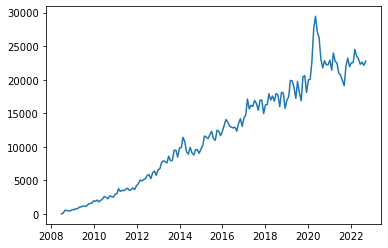

In [35]:
plt.plot(reshaped_df.python)

Let's look at a couple of methods that will help us style our chart:

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound



To make our chart larger we can provide a width (16) and a height (10) as the figsize of the figure.

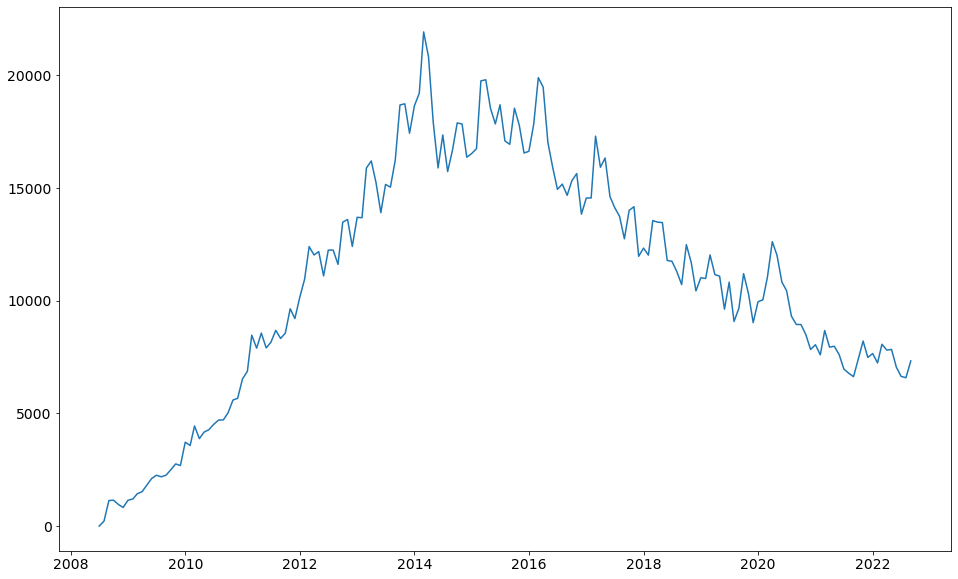

In [37]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

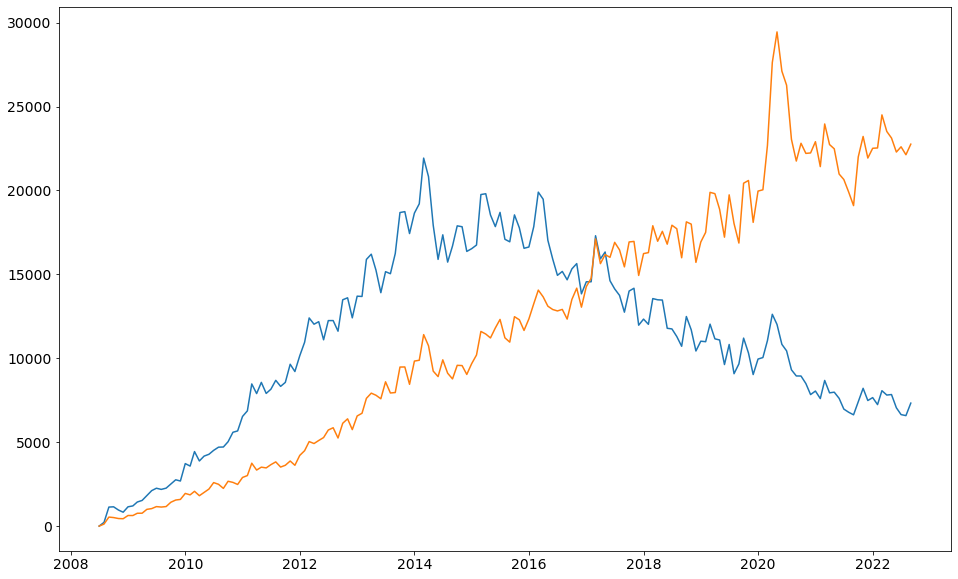

In [39]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.java)
plt.plot(reshaped_df.python)

To plot every single column in the data frame we can just put in a for loop

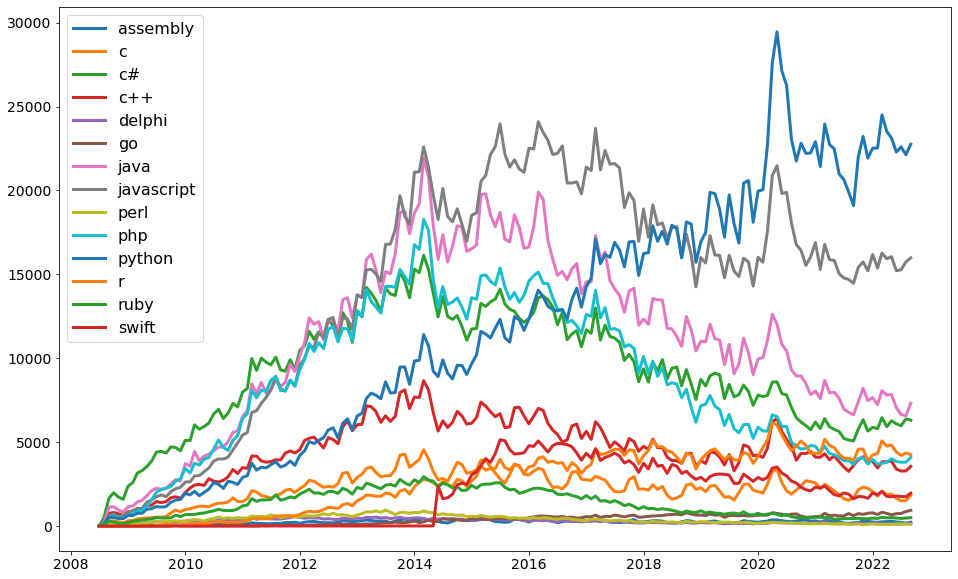

In [41]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for column in reshaped_df.columns:
    plt.plot(reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

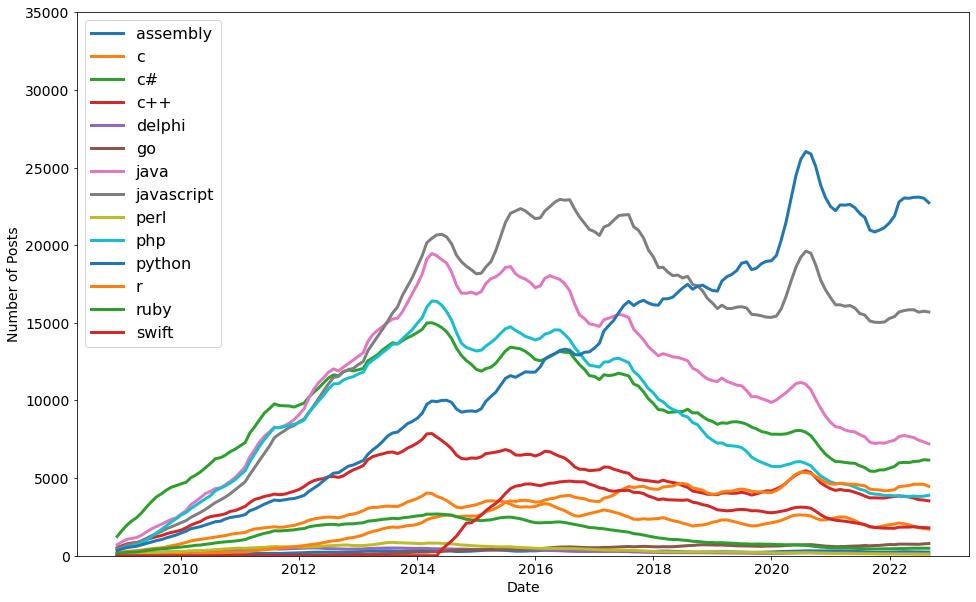

In [42]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)